<a href="https://colab.research.google.com/github/Natanlimap/machine_learning/blob/main/filmes_algoritimos_nao_supervisionados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introdução** \\
A motivação para esse estudo é aprender os fundamentos de machine learning e coloca-los em práticas com um exemplo do cotidiano. \\
Para isso, utilizaremos uma base de dados de filmes disponibilizada pelo Alura Cursos e seguiremos os passos indicados pelo curso de *MACHINE LEARNING: INTRODUÇÃO A ALGORITMOS NÃO SUPERVISIONADOS*

Abaixo podemos ver o link que será utilizado como base de dados

In [ ]:
uri_filmes = "https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv"

**Visualização da base de dados** \\
Primeiro, iremos ler esses dados, utilizando a bibliotecas do Pandas, e visualizar os primeiros 5 elementos

In [ ]:
import pandas as pd

In [ ]:
filmes = pd.read_csv(uri_filmes)
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Para melhor compreensão, traduziremos os titulos das colunas

In [ ]:
filmes.columns = ["ID", "titulo", "genero"]
filmes.head()

,ID,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Podemos perceber que a coluna de *genero* é um campo com múltiplas respostas separadas por **|**. Portanto, para melhor visualização, gostariamos de separar e identificar quais são os gêneros de cada um deles. Para isso, podemos distribuir esse campo em várias colunas e indicar de forma booleana (0 ou 1) se o filme é daquele gênero ou não.

In [ ]:
generos_distribuidos = filmes.genero.str.get_dummies()
tabela_filmes = pd.concat([filmes, generos_distribuidos], axis=1)
tabela_filmes.head()

,ID,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Visto que distribuímos os gêneros, podemos, então, excluir a terceira coluna da tabela - pois seria uma repetição desnecessária.

In [ ]:
tabela_filmes = tabela_filmes.drop(columns=['genero'])
tabela_filmes.head()

,ID,titulo,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Problemática 1 - Categorizar o gênero de maior relevância para cada filme**

---
Para resolver esse problema, utilizaremos um padronizador de dados do sklearn chamado de StandardScaler. Esse escalador, transformara nossos resultados booleanos (0 ou 1) em variáveis de ponto flutuante, estabelecendo, assim, uma melhor compreensão da relevância de cada gênero para cada filme.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos_distribuidos)


Para garantir que não há perda de dados podemos utilizar o seguinte:

In [ ]:
generos_escalados.shape

(9742, 20)

Quantidade de filmes = 9742 \\
Gêneros = 20

**Problemática 2 - Dividir os grupos a partir de sua similaridade de gênero**

---
Para resolver esse problema, utilizaremos o KMeans da biblioteca sklearn.
Entretanto, surge uma questão. Como saber a quantidade de grupos que devemos dividir?
Para isso, utilizaremos o kmeans e o valor de inertia, conhecido como erro médio ao quadrado, para a divisão em grupos de 1 a 50. Em seguida seguiremos o "método do cotovelo" para assegurar a nossa decisão de qual a quantidade ideal. 

**O que é o método do cotovelo?**

Esse método consiste em observar o ponto de inflexão do momento em que o grafico diminui sua inclinação decrescente (como um cotovelo levemente flexionado)

Criaremos uma função para facilitar a nossa observação

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
def kmeans_dividir_grupos(grupos, generos):
  modelo = KMeans(n_clusters= grupos)
  modelo.fit(generos)
  return [grupos, modelo.inertia_]

In [ ]:
resultado = [kmeans_dividir_grupos(numero, generos_escalados) for numero in range(1, 50)]
resultado

[[1, 194840.0],
 [2, 180374.21168840796],
 [3, 168260.97207073594],
 [4, 156622.8836623756],
 [5, 146366.4202860575],
 [6, 137387.33861886294],
 [7, 128269.4975724348],
 [8, 119245.06717053185],
 [9, 111166.78454732164],
 [10, 101321.71253266543],
 [11, 94610.54740224525],
 [12, 87490.11368372155],
 [13, 79579.47000972419],
 [14, 73537.11473125598],
 [15, 67483.73576325885],
 [16, 63189.11905827868],
 [17, 62148.33941940314],
 [18, 59207.92889474092],
 [19, 56736.58692049469],
 [20, 55135.50871452243],
 [21, 53690.47191377038],
 [22, 52763.45648611382],
 [23, 50717.369318865945],
 [24, 49417.291211317286],
 [25, 47373.76696357155],
 [26, 47153.467162082175],
 [27, 45625.79192176637],
 [28, 44828.38274882984],
 [29, 43017.698680377594],
 [30, 42016.77895609304],
 [31, 42157.67414480395],
 [32, 40871.47628821617],
 [33, 39960.08648916685],
 [34, 39559.0333771511],
 [35, 38608.69091695839],
 [36, 38028.946467808215],
 [37, 36730.014419526706],
 [38, 36476.55427810667],
 [39, 35725.9180380

Dentro de cada colchete, o primeiro dado representa a quantidade de grupos e o segundo dado, o valor da inertia

Para visualizarmos melhor, iremos transformar esses dados em uma tabela utlizando o pandas

In [ ]:
tabela_resultado = pd.DataFrame(resultado, columns= ['qtd_grupos', 'inertia'])
tabela_resultado

,qtd_grupos,inertia
0,1,194840.000000
1,2,180374.211688
2,3,168260.972071
3,4,156622.883662
4,5,146366.420286
5,6,137387.338619
6,7,128269.497572
7,8,119245.067171
8,9,111166.784547
9,10,101321.712533


Como podemos identificar o ponto de inflexão? \\
Para isso, geraremos um gráfico com esses valores. \\
E utilizaremos o figsize para ampliar nosso gráfico

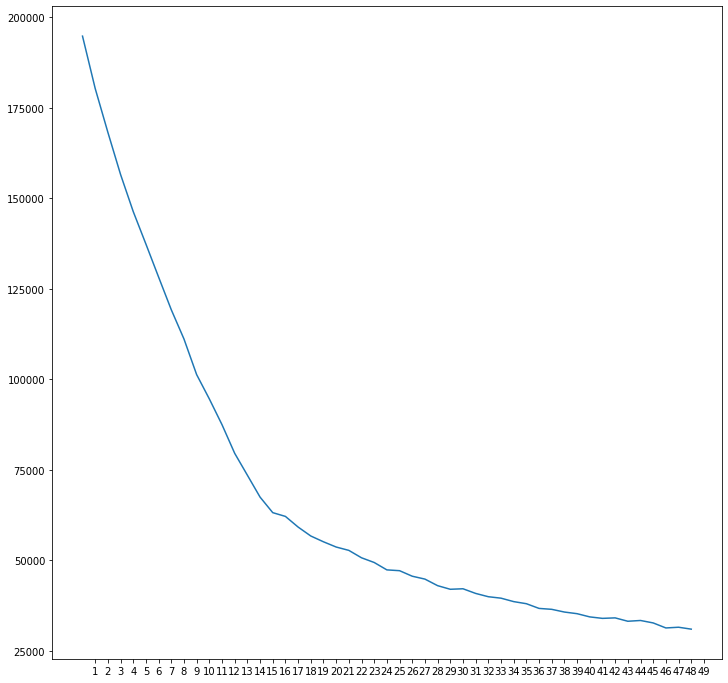

In [ ]:
tabela_resultado.inertia.plot(xticks=tabela_resultado.qtd_grupos, figsize=(12,12))

Semelhante a imagem de um cotovelo, identificamos que seu ponto de inflexão ocorre quando x = 17

Agora sim, podemos realizar a divisão de grupos de forma mais eficiente

In [ ]:
numero_grupos = 17

In [ ]:
modelo_kmeans = KMeans(n_clusters=numero_grupos)
modelo_kmeans.fit(generos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=17, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Depois de dividido, vamos gerar uma tabela de cada grupo, separadamente, disitribuindo o generos e a sua relevância em cada um utilizando o Pandas.

In [ ]:
tabela_grupos = pd.DataFrame(modelo_kmeans.cluster_centers_, columns=generos_distribuidos.columns)
tabela_grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,-0.455434,-0.356691,-0.238411,-0.260702,-0.595253,-0.344716,4.597924,-0.806365,-0.276693,-0.094926,-0.317703,-0.128397,-0.188419,-0.229101,-0.429357,-0.334435,-0.478842,-0.202020,-0.132065
1,-0.059180,-0.370405,-0.301246,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,0.987994,-0.210379,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.040600,-0.202020,-0.132065
2,-0.059180,-0.316543,-0.297084,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.297431,-0.180170,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.447259,-0.202020,-0.132065
3,-0.059180,-0.157286,-0.262642,-0.226139,-0.207840,-0.516565,0.489914,-0.217489,0.146929,-0.025752,-0.094926,0.519168,-0.128397,-0.188419,4.000218,-0.144205,0.052446,1.173369,-0.202020,-0.132065
4,-0.059180,1.026999,1.121377,0.628865,0.482962,-0.441032,-0.162713,0.026329,-0.492945,0.801904,-0.094926,-0.081328,7.788339,0.089846,-0.088586,-0.288731,0.970137,0.068485,-0.071589,-0.034545
5,-0.059180,1.743818,1.520002,-0.258679,-0.270451,-0.394728,-0.227440,-0.217489,-0.417905,0.617983,-0.094926,-0.269692,-0.128397,-0.188419,-0.225324,-0.275402,-0.334435,0.593769,-0.202020,-0.132065
6,-0.059180,-0.281975,-0.357596,-0.258679,-0.265053,-0.367240,-0.217259,-0.217489,-0.585592,-0.018925,-0.094926,2.993517,-0.128397,-0.188419,-0.249986,-0.361762,0.249058,0.598550,-0.202020,-0.132065
7,-0.059180,-0.333405,-0.317512,-0.163864,-0.270451,-0.744895,1.444723,-0.217489,0.255531,-0.252433,10.534563,-0.257559,-0.128397,-0.188419,0.922484,-0.194188,-0.219795,0.699553,-0.202020,-0.043513
8,-0.059180,-0.169420,1.049673,1.460493,3.697524,0.379160,-0.323425,-0.217489,-0.588252,0.814684,-0.094926,-0.315396,-0.128397,-0.188419,-0.186432,-0.306279,-0.029943,-0.481813,-0.182760,-0.132065
9,16.897616,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.202020,-0.132065


Vamos pegar essa tabela e transformá-la em gráficos de barras

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f73ec6230f0>,
      dtype=object)

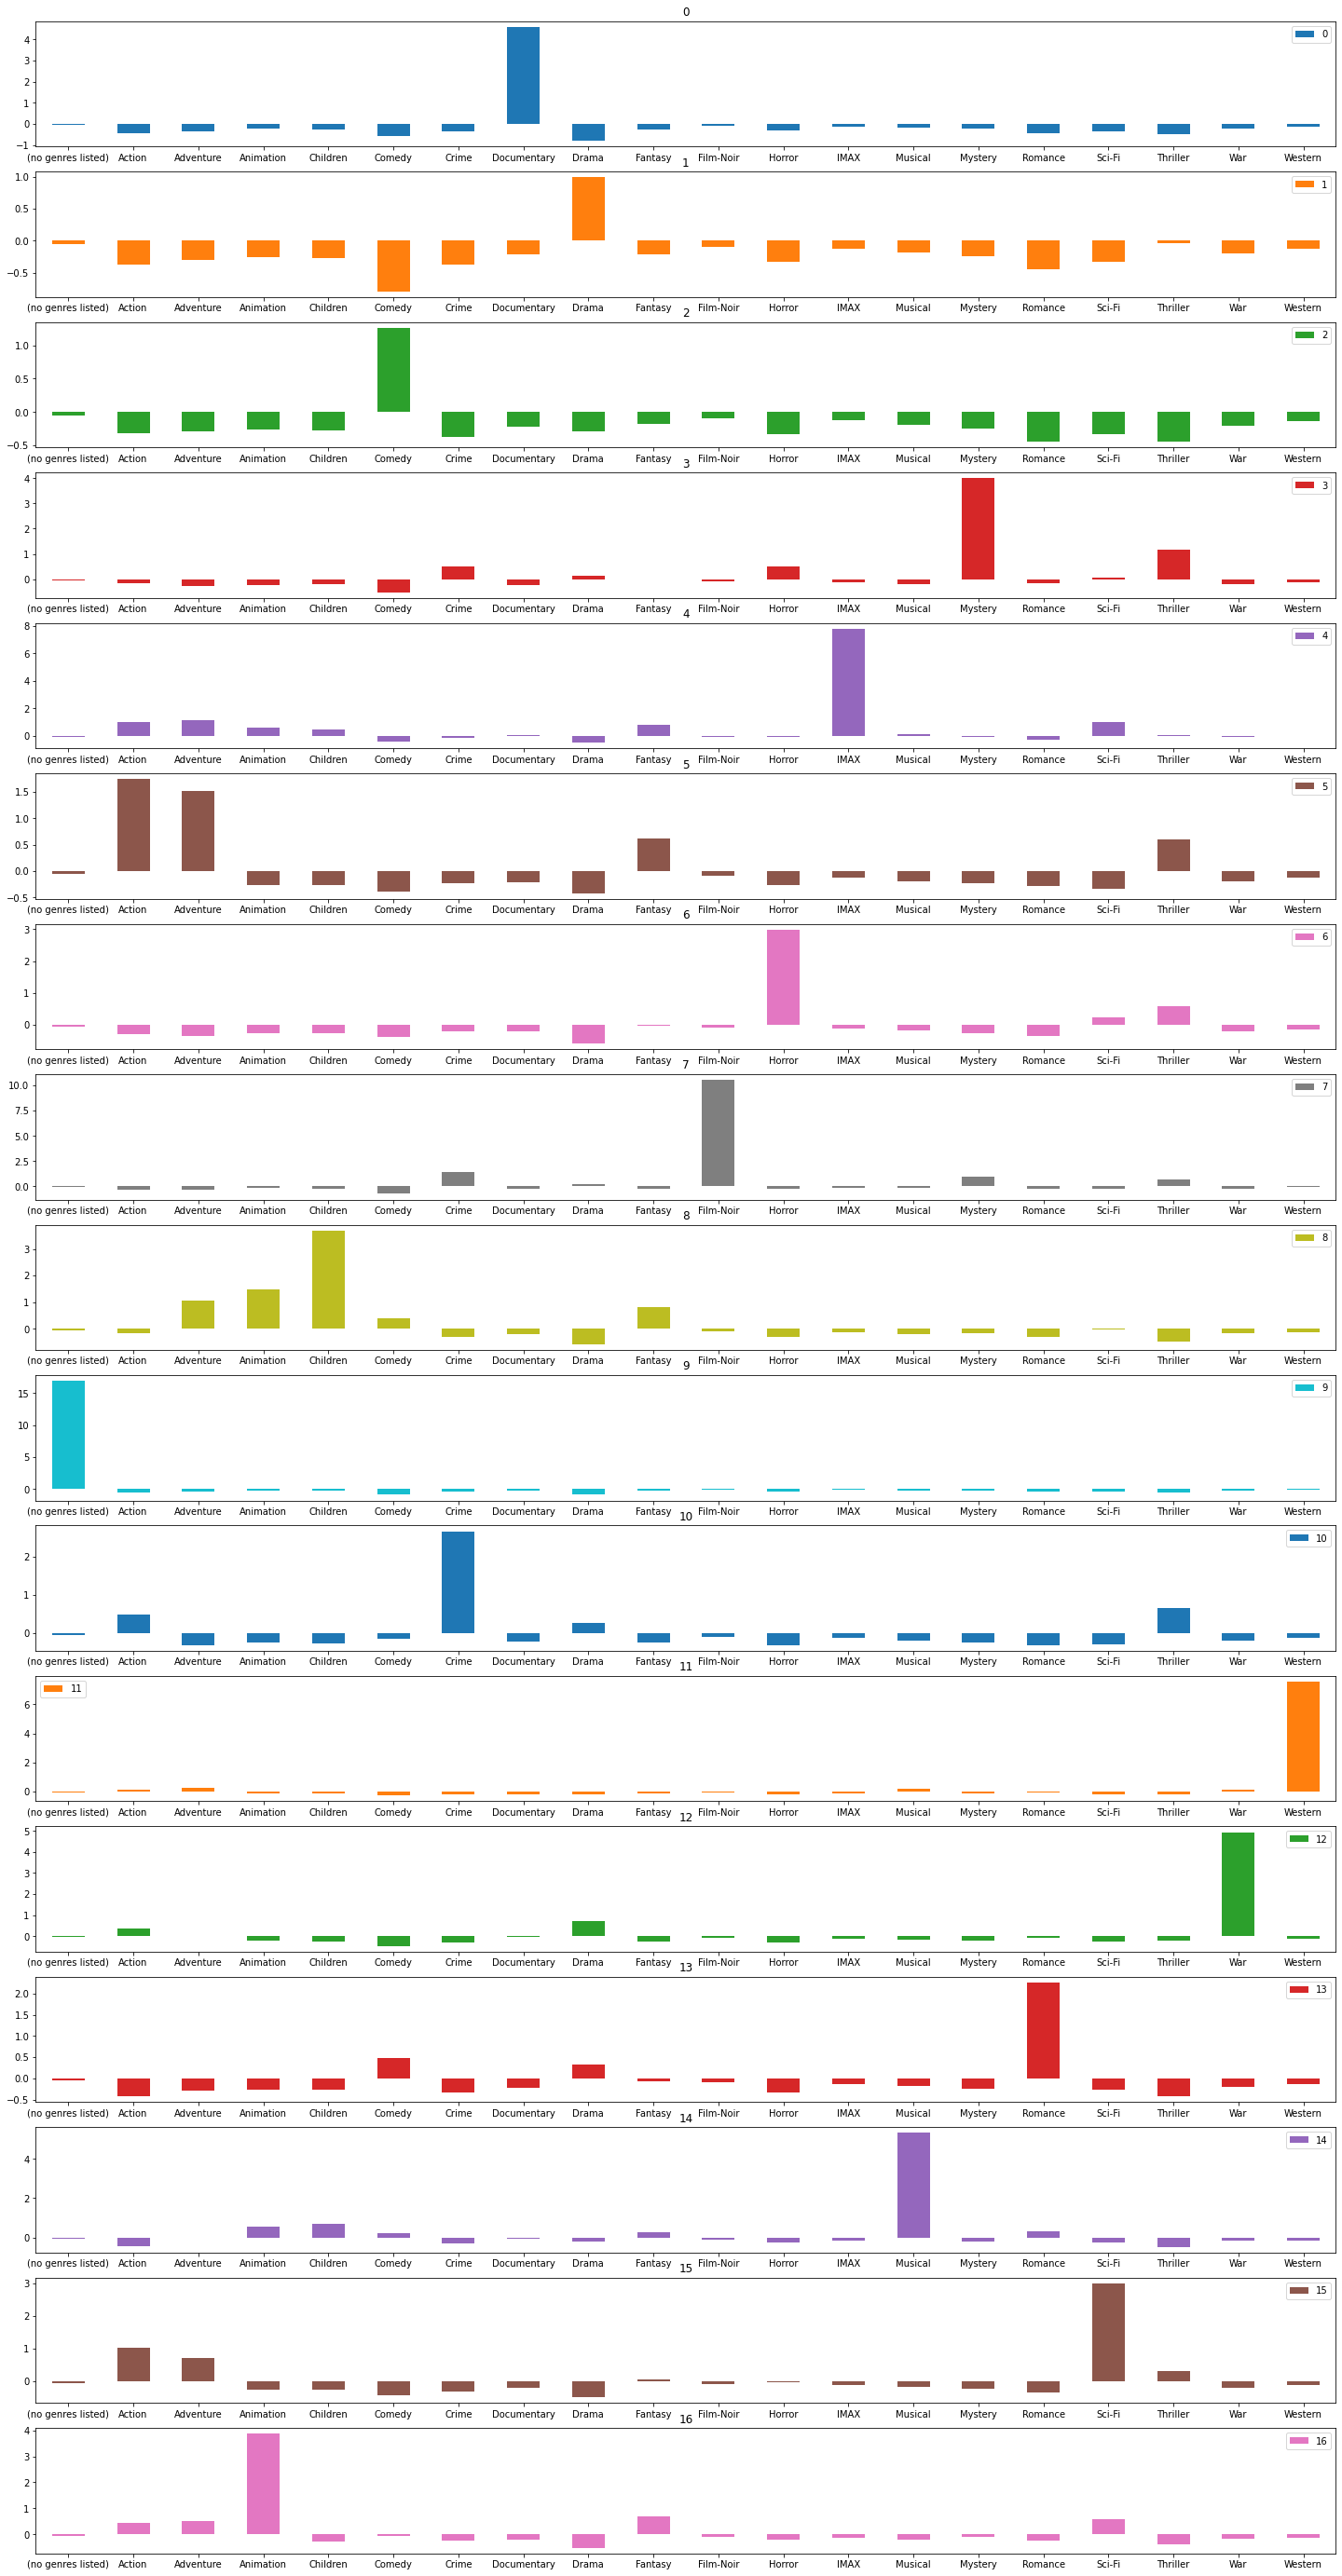

In [ ]:
tabela_grupos.transpose().plot.bar(subplots=True, figsize=(25, 50), sharex=False, rot=0)

Apenas para demonstração, vamos visualizar os primeiros 10 filmes do grupo 0


In [ ]:
grupo = 1
filtro = modelo_kmeans.labels_ == grupo

tabela_filmes[filtro].sample(10)

,ID,titulo,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1889,2512,"Ballad of Narayama, The (Narayama bushiko) (1983)",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2904,3894,Solas (1999),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4786,7125,Spring Forward (1999),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2805,3747,Jesus' Son (1999),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8242,104303,Jobs (2013),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
724,944,Lost Horizon (1937),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8393,109968,Why Don't You Play In Hell? (Jigoku de naze wa...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5608,27006,RKO 281 (1999),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8664,121169,The Duke of Burgundy (2014),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1590,2132,Who's Afraid of Virginia Woolf? (1966),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


**Problemática 3 - Hierarquia de semelhança entre grupos**

---
Apesar de termos dividido os filmes em grupos a partir da semelhança entre seus gêneros, sabemos que isso não engloba a semelhança entre os gêneros por si só. Por exemplo, filmes de terror raramente estão associados a filmes de romance. Entretanto, podemos dizer que filmes de terror possuem uma certa semelhança com filmes de suspense, e não só isso, mas que, também,  filmes de terror são mais próximos aos filmes de suspense do que aos filmes de romance. Então, se tivermos um filme de suspense e ficção cientifica, provavalmente, esse filme não estará contido no grupo de filmes de terror. Entretanto, podemos criar uma  associações entre esses grupos (suspense e terror) de forma a hierarquizar os grupos e suas semelhanças.\\
Para resolver esse problema, utilizaremos o AgglomerativeClustering associado ao TSNE e o seaborn, como veremos a seguir

In [ ]:
modelo_agglomerative = AgglomerativeClustering(n_clusters=numero_grupos)
hierarquia_generos = modelo_agglomerative.fit_predict(generos_escalados)
hierarquia_generos


array([ 5, 14, 13, ...,  2,  5,  3])

Vamos agora utilizar o tsne para visualização baseada na incorporação de vizinhança estocástica

In [ ]:
tsne = TSNE()
vizinhanca_generos = tsne.fit_transform(generos_escalados)
vizinhanca_generos

array([[ 20.458464 ,  33.210094 ],
       [ 12.245441 ,  42.439957 ],
       [ 36.101833 , -25.799929 ],
       ...,
       [  3.4154725,  18.025234 ],
       [-22.135761 ,   4.6927795],
       [  3.9409337, -22.107443 ]], dtype=float32)

Agora vamos gerar um gráfico de dispensão passando como parâmetros de cores os grupos aglomerados

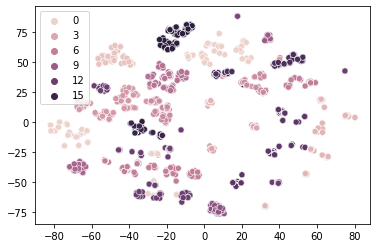

In [ ]:
sns.scatterplot(x=vizinhanca_generos[:, 0],
               y=vizinhanca_generos[:, 1],
               hue=hierarquia_generos)

Iremos agora gerar o tabela de grupos e a arvore hierarquizada de grupos para podermos ver a associação entre os generos do grupo e sua associação

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f73ebca29b0>,
      dtype=object)

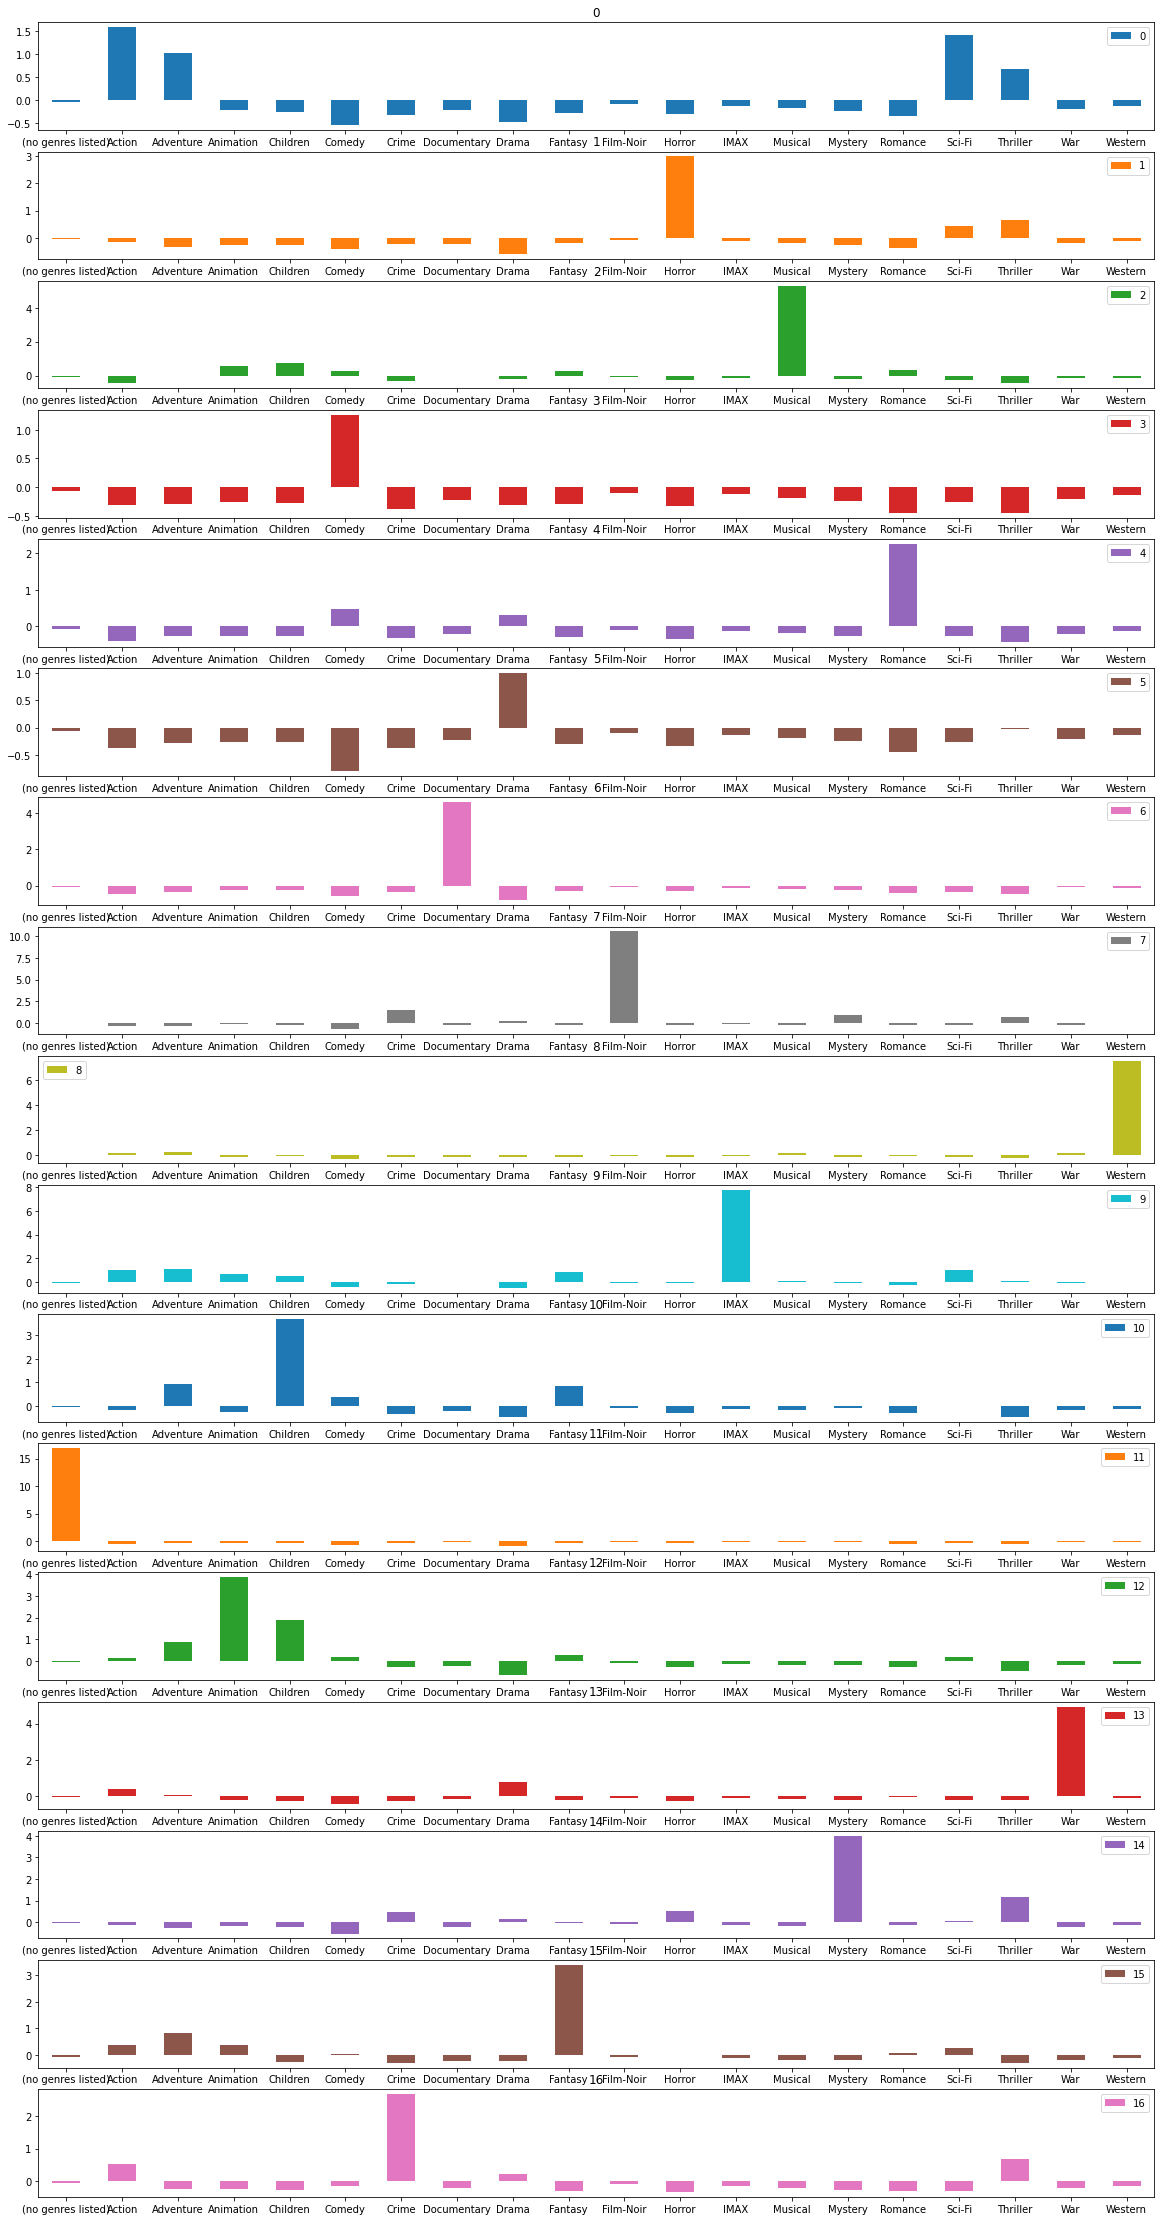

In [ ]:
modelo_kmeans = KMeans(n_clusters=numero_grupos)
modelo_kmeans.fit(generos_escalados)
hierarquia_generos = pd.DataFrame(modelo_kmeans.cluster_centers_, columns=generos_distribuidos.columns)
hierarquia_generos.transpose().plot.bar(subplots=True, figsize=(20, 40), sharex=False, rot=0)

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

matriz_de_distancia = linkage(hierarquia_generos)

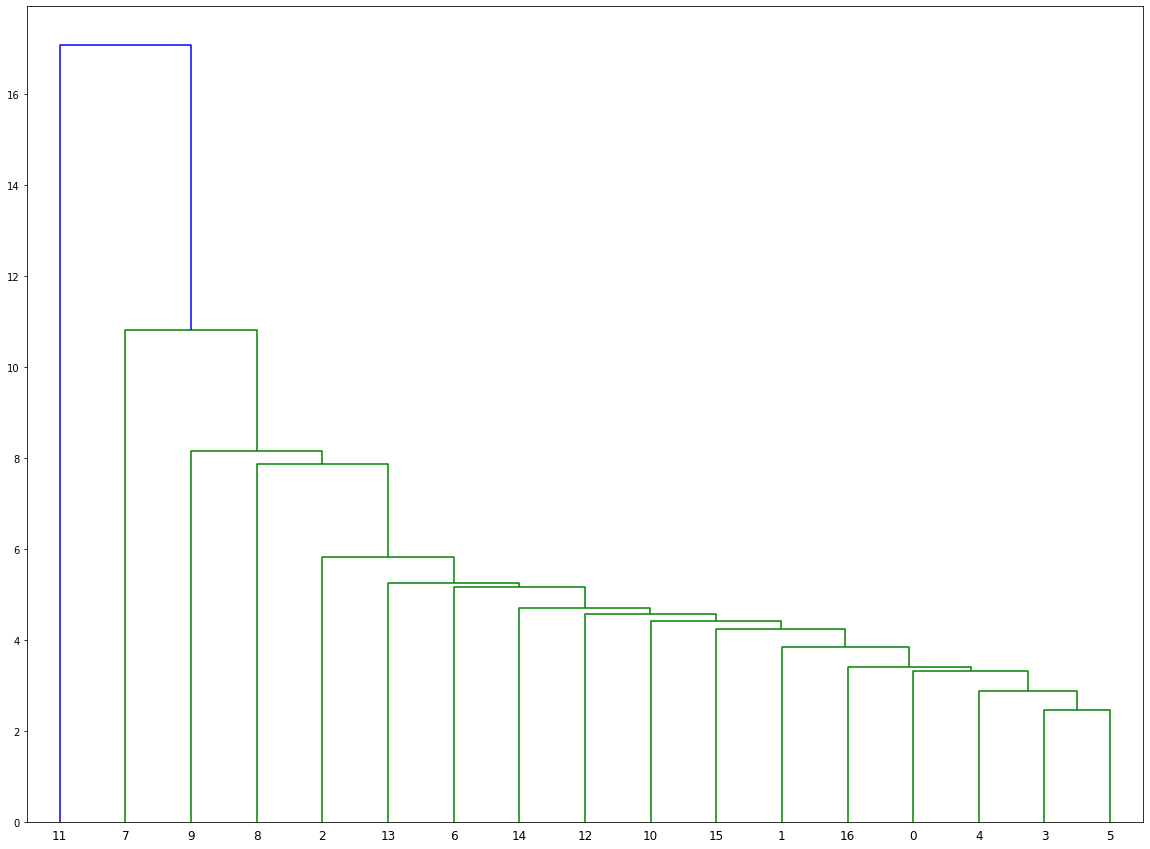

In [ ]:
plt.figure(figsize=(20,15))
dendograma = dendrogram(matriz_de_distancia)

**Aprendizados**

---
Antes de concluir o meu primeiro estudo de machine learning, gostaria de elencar os principais aprendizados que tive durante o processo:


*   Os dados 'binários' podem significar muito mais que apenas True ou False .
*   A escolha correta do numero de grupos faz toda diferença no estudo de caso.
*   Podemos atribuir uma relação de semelhança de forma interna (dentro do grupo) e externa (entre grupos)
*   A visualização hierárquica em forma de árvores nos permite entender a proximidade  e a influência de uma determinada variável com todas as suas possibilidades.



